# Feature importance
- As mentioned previously, there is two type of dataset. For this task second data type is used which contains descirption of patients' helath with with AD and without AD. It is also important which parameter is connected most with AD.  

In [114]:
# environment for this notbook
import numpy as np

import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline

import matplotlib.pyplot as plt

from eli5.sklearn import PermutationImportance
from eli5 import show_weights

# Pre-processing

- Mostly same process performed as shown in first part. There is two categorical dataset Ad and HC. Combine these dataset and add label according to thier category 0 and 1 respectively. After getting one combined dataset, split it into train and test part for the classification.

In [115]:
path1=r"C:\Users\uttam\OneDrive\Desktop\NLP Project\NLP-Project\Data\AD-Description.csv"
path2=r"C:\Users\uttam\OneDrive\Desktop\NLP Project\NLP-Project\Data\HC-Description.csv"
df1=pd.read_csv(path1)
df2=pd.read_csv(path2)

In [116]:
label_AD=0
df1['label']=label_AD
label_HC=1
df2['label']=label_HC
df=pd.concat([df1,df2],ignore_index=True)
df=df.sample(frac=1,random_state=42,ignore_index=True)
df.head(7)

,ID_Pitt,Gender,Age,Scholarity,MMSE_Pitt,Session,label
0,299.0,0.0,62.0,12.0,29.0,1.0,1
1,691.0,0.0,77.0,14.0,29.0,0.0,1
2,346.0,0.0,65.0,10.0,19.0,0.0,0
3,264.0,0.0,65.0,11.0,17.0,0.0,0
4,252.0,1.0,62.0,18.0,22.0,0.0,0
5,678.0,1.0,80.0,16.0,29.0,0.0,1
6,87.0,0.0,76.0,9.0,3.0,1.0,0


In [117]:
x=df.drop(['label','MMSE_Pitt', 'ID_Pitt','Gender'],axis=1)
y=df['label']

# Classification model

- Best classification model achieved by the evaluation of couple of desired classification model on these dataset. 

- SVC, Kneighbor, Gaussian has  around 90%, on the other hand Decision tree, Gradient boosting classifier slightly perform better.

In [118]:
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.30,random_state=42)  
Tree_model = DecisionTreeClassifier(max_depth=50)
model = make_pipeline(MinMaxScaler(), Tree_model)

In [119]:
scores = cross_validate(model, X_train, y_train, cv=5,return_estimator=True)
print(scores['test_score'])
number=np.argmax(scores['test_score'])
print(number)

[0.59259259 0.69230769 0.69230769 0.65384615 0.61538462]
1


In [120]:
# Best estimator
best_estimator=scores['estimator'][number]
best_estimator.fit(X_train, y_train)
y_pred=best_estimator.predict(X_test)

In [121]:
# Accuracy of model
print(f"Accuracy score :{metrics.accuracy_score(y_test,y_pred)}")

Accuracy score :0.5789473684210527


In [122]:
# Feature importance
perm = PermutationImportance(best_estimator)
perm.fit(x,y)

show_weights(perm, feature_names = x.columns.tolist())

Weight,Feature
0.2202 ± 0.0305,Scholarity
0.2064 ± 0.0227,Age
0.0936 ± 0.0488,Session


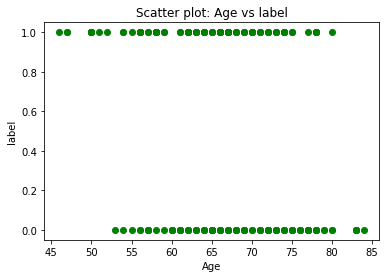

In [123]:
# Vizualisation
# plt.scatter(df['MMSE_Pitt'], df['label'], c='r',alpha=1)
# plt.xlabel('MMSE_Pitt')
# plt.ylabel('label')
# plt.title('Scatter plot: MMSE_Pitt vs label')
# plt.show()

plt.scatter(df['Age'], df['label'], c='g', alpha=1)
plt.xlabel('Age')
plt.ylabel('label')
plt.title('Scatter plot: Age vs label')
plt.show()

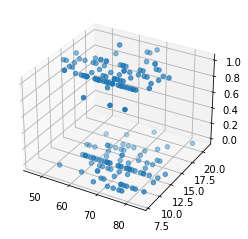

In [124]:
# 3D-plot
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(df['Age'],df['Scholarity'] ,df['label'] )

# Conclusion

- Therefore, based on the results of the feature importance analysis, it can be concluded that Mini-Mental State Examination (MMSE), Scholarity, and Age are the key indicators for detecting alzheimer's disease. While session has negligible importance. A MMSE score between 25–30 indicates good cognitive function. Yet, this is not always the case. Sometimes patients with more than 25 MMSE scores also have Alzheimer's disease. Nonetheless, Alzeihmer is always likely to be present if the MMSE score is less than 25. Also, at the age of 52, Alzeihmer risk increases significantly. With these observations in mind, Alzheimer's disease detection and diagnosis are simple.